In [163]:
import numpy as np
import pandas as pd

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Scaling the data
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *
from imblearn.metrics import *

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFECV

In [164]:
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_row',None)

Reading the Data

In [165]:
data = pd.read_csv('D:/SASTRA_AI_DS/MIni_project/Ovarian_Cancer_Diagnosis/Dataset/data_pre_meno.csv')

In [166]:
data

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Menopause,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,3.58,19.36,47,45.4,56.0,11.0,24.0,0.01,0.30,5.35,2.48,15.36,36.48,6.42,1.40,107.4,19.9,103.0,2.0,0.04,1.00,16.0,28.5,4.67,0.273,NaN,89.0,3.5,5.36,0.65,16.8,33.7,103.4,0,0.78,0.22,5.70,11.70,141.3,76.2,0.090,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4,0
1,1.50,18.40,39,45.4,77.0,9.0,18.0,0.03,0.60,3.80,2.57,56.08,12.18,NaN,0.77,102.6,22.2,48.0,4.7,0.03,0.60,10.0,32.5,4.64,0.391,47.56,131.0,10.1,4.30,1.10,23.7,28.4,84.6,0,1.00,0.25,5.40,11.40,138.9,69.7,0.130,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2,0
2,2.36,19.97,45,35.0,47.0,21.0,27.0,0.01,0.10,4.89,2.48,1391.00,11.15,NaN,0.42,99.6,26.2,70.3,2.2,0.11,1.60,24.0,31.5,4.07,0.383,404.90,122.0,3.1,4.77,1.98,28.8,27.7,87.0,0,1.08,0.69,10.00,10.40,141.0,59.5,0.280,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0,0
3,3.79,17.39,44,32.9,118.0,51.0,32.0,0.02,0.42,4.47,2.49,55.97,22.57,0.74,1.33,99.3,20.1,80.7,5.9,0.01,0.19,75.0,39.4,7.52,0.306,49.95,96.5,2.2,4.89,0.52,11.1,21.8,69.0,0,0.93,0.07,1.51,9.49,131.9,86.8,0.265,19.1,0.68,279,4.44,21.7,8.1,72.3,218.2,0
4,NaN,21.87,53,NaN,NaN,NaN,NaN,0.02,0.50,2.60,2.24,NaN,NaN,NaN,NaN,103.2,21.3,44.0,NaN,0.06,1.50,NaN,NaN,7.10,0.421,NaN,138.0,NaN,4.20,1.28,32.7,29.7,90.7,0,0.65,0.19,4.80,12.10,137.7,60.5,0.180,16.8,1.50,148,4.64,12.1,NaN,NaN,151.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3.27,21.32,43,48.6,60.0,30.0,16.0,0.03,0.50,4.86,2.58,13.61,8.37,NaN,0.59,96.5,24.6,67.0,2.9,0.06,1.10,29.0,25.8,4.39,0.440,40.17,147.0,4.8,4.12,1.36,24.3,30.4,91.1,0,0.94,0.21,3.80,10.90,138.3,NaN,0.230,13.2,1.07,210,4.83,12.1,7.7,74.4,379.0,1
226,2.09,20.91,52,48.6,65.0,40.0,30.0,0.00,0.00,4.29,2.81,50.80,15.11,NaN,1.74,98.1,25.9,54.0,3.8,0.01,0.30,36.0,31.8,5.13,0.415,31.45,142.0,6.9,4.11,1.18,30.7,31.1,91.0,0,0.94,0.28,7.30,9.90,140.8,NaN,0.220,10.8,0.99,219,4.56,11.9,10.7,80.4,241.5,1
227,2.00,12.14,37,46.1,49.0,9.0,20.0,0.00,0.00,3.12,2.29,21.93,0.62,NaN,1.67,103.6,25.0,67.0,5.9,0.02,0.30,9.0,27.4,4.59,0.285,44.44,80.0,11.3,3.64,1.39,23.3,18.9,67.2,0,0.77,0.32,5.40,11.90,137.1,NaN,0.310,17.3,0.95,262,4.24,17.7,17.2,73.5,240.5,1
228,1.84,27.22,30,47.8,64.0,26.0,22.0,0.03,0.30,3.61,2.82,53.87,10.71,NaN,0.93,93.1,23.1,59.0,3.5,0.23,2.20,25.0,28.2,5.59,0.458,30.78,154.0,7.8,4.22,2.15,20.6,28.8,85.6,0,1.02,0.43,4.10,10.50,139.2,NaN,0.420,13.4,1.31,398,5.35,12.5,11.3,76.0,285.7,1


In [167]:
data.shape

(230, 50)

In [168]:
data['Menopause'].value_counts()

Menopause
0    230
Name: count, dtype: int64

In [169]:
data = data.drop('Menopause', axis=1)

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AFP     217 non-null    float64
 1   AG      229 non-null    float64
 2   Age     230 non-null    int64  
 3   ALB     220 non-null    float64
 4   ALP     220 non-null    float64
 5   ALT     220 non-null    float64
 6   AST     220 non-null    float64
 7   BASO#   230 non-null    float64
 8   BASO%   230 non-null    float64
 9   BUN     230 non-null    float64
 10  Ca      230 non-null    float64
 11  CA125   219 non-null    float64
 12  CA19-9  215 non-null    float64
 13  CA72-4  78 non-null     float64
 14  CEA     217 non-null    float64
 15  CL      230 non-null    float64
 16  CO2CP   229 non-null    float64
 17  CREA    230 non-null    float64
 18  DBIL    220 non-null    float64
 19  EO#     230 non-null    float64
 20  EO%     230 non-null    float64
 21  GGT     220 non-null    float64
 22  GL

In [171]:
data.describe()

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
count,217.000000,229.000000,230.000000,220.000000,220.000000,220.000000,220.000000,230.000000,230.000000,230.000000,230.000000,219.000000,215.000000,78.000000,217.000000,230.000000,229.000000,230.000000,220.000000,230.000000,230.000000,220.000000,220.000000,230.000000,230.000000,218.000000,230.00000,220.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,228.00000,230.000000,153.000000,228.000000,228.000000,230.000000,230.000000,230.000000,230.000000,220.000000,220.000000,230.000000,230.000000
mean,16.260415,19.363799,36.508696,41.745000,71.704545,17.781818,17.550000,0.029957,0.513087,3.764609,2.435696,155.584201,44.383256,5.425641,3.530783,100.768261,24.009170,63.600870,3.180000,0.069739,1.187957,20.018182,29.998636,5.061304,0.382570,91.628440,125.10913,5.865000,4.386130,1.628130,27.528957,28.639652,87.375652,0.983957,0.344870,5.545130,9.99614,139.976957,64.073399,0.242860,14.554167,1.113957,245.095652,4.375739,13.741826,9.045000,71.474091,233.604348,0.673913
std,120.412242,3.864685,9.956123,5.261545,51.480537,11.433654,7.318099,0.021280,0.365418,1.043799,0.268410,354.411240,124.187002,9.667364,12.958631,2.741034,2.482616,10.830198,1.416072,0.073970,1.234068,17.204641,4.384921,0.763539,0.039367,198.410868,14.94638,2.471759,0.378454,0.558693,10.018714,2.680921,6.024899,0.124548,0.144533,1.836457,1.72380,2.660259,11.032853,0.079997,2.847607,0.186904,76.666347,0.407983,1.921712,3.664132,7.211148,61.103937,0.469802
min,0.610000,6.700000,15.000000,23.500000,28.000000,5.000000,7.000000,0.000000,0.000000,1.250000,0.920000,5.940000,0.600000,0.200000,0.200000,88.800000,16.200000,38.200000,0.900000,0.000000,0.000000,4.000000,19.000000,3.570000,0.224000,16.710000,61.80000,1.000000,3.330000,0.380000,5.100000,18.100000,61.800000,0.650000,0.070000,0.300000,5.89000,125.100000,40.400000,0.070000,8.800000,0.650000,74.000000,2.640000,10.920000,2.500000,32.900000,96.000000,0.000000
25%,1.500000,17.300000,28.000000,39.175000,55.000000,11.000000,13.000000,0.010000,0.200000,3.087500,2.340000,17.655000,8.425000,0.845000,0.800000,99.200000,22.400000,56.000000,2.200000,0.020000,0.372500,11.000000,26.875000,4.602500,0.361000,40.040000,118.00000,4.000000,4.155000,1.222500,20.025000,27.920000,85.000000,0.902500,0.250000,4.200000,8.99000,138.600000,56.400000,0.190000,12.275000,0.990000,200.250000,4.140000,12.400000,6.375000,68.275000,197.125000,0.000000
50%,2.200000,19.750000,37.000000,42.600000,65.000000,14.500000,16.000000,0.030000,0.400000,3.745000,2.470000,35.980000,14.570000,2.135000,1.210000,100.700000,23.800000,63.000000,2.900000,0.050000,0.900000,15.000000,29.550000,4.955000,0.386000,45.970000,127.00000,5.500000,4.365000,1.575000,28.400000,29.300000,88.500000,0.970000,0.320000,5.500000,10.30000,140.100000,63.900000,0.239000,14.050000,1.110000,233.000000,4.385000,13.200000,8.400000,72.600000,226.400000,1.000000
75%,3.470000,21.870000,45.000000,45.625000,77.000000,20.000000,20.000000,0.040000,0.727500,4.367500,2.580000,95.045000,28.675000,5.790000,1.890000,102.500000,25.500000,70.000000,3.800000,0.090000,1.595000,22.000000,32.400000,5.397500,0.407750,57.015000,135.00000,7.200000,4.652500,1.957500,34.475000,30.375000,91.000000,1.050000,0.410000,6.592500,11.12500,141.675000,71.300000,0.290000,17.000000,1.230000,279.000000,4.657500,14.675000,10.900000,76.050000,264.950000,1.000000
max,1210.000000,33.330000,57.000000,51.500000,763.000000,86.000000,64.000000,0.120000,1.940000,7.840000,2.830000,2233.000000,1000.000000,64.880000,138.800000,108.100000,34.300000,103.000000,12.100000,0.400000,7.600000,120.000000,43.300000,8.980000,0.481000,1994.400000,156.00000,17.500000,5.390000,3.490000,51.600000,36.800000,107.900000,1.370000,0.970000,12.140000,14.00000,150.700000,89.800000,0.690000,22.800000,1.750000,7

In [172]:
data.isnull().sum()

AFP        13
AG          1
Age         0
ALB        10
ALP        10
ALT        10
AST        10
BASO#       0
BASO%       0
BUN         0
Ca          0
CA125      11
CA19-9     15
CA72-4    152
CEA        13
CL          0
CO2CP       1
CREA        0
DBIL       10
EO#         0
EO%         0
GGT        10
GLO        10
GLU.        0
HCT         0
HE4        12
HGB         0
IBIL       10
K           0
LYM#        0
LYM%        0
MCH         0
MCV         0
Mg          0
MONO#       0
MONO%       0
MPV         2
Na          0
NEU        77
PCT         2
PDW         2
PHOS        0
PLT         0
RBC         0
RDW         0
TBIL       10
TP         10
UA          0
TYPE        0
dtype: int64

In [173]:
data.shape

(230, 49)

Imputation

In [174]:
# Separate Age and Type
age_type_df = data[['Age', 'TYPE']] 
data_df = data.drop(columns=['Age', 'TYPE'])  

In [175]:
imputer = KNNImputer(n_neighbors=5)
data_knn_imputed = pd.DataFrame(imputer.fit_transform(data_df), columns=data_df.columns)

In [176]:
data_knn_imputed

,AFP,AG,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
0,3.580,19.36,45.40,56.0,11.0,24.0,0.01,0.30,5.35,2.48,15.360,36.480,6.420,1.400,107.4,19.9,103.0,2.00,0.04,1.00,16.0,28.50,4.67,0.273,43.002,89.0,3.50,5.36,0.65,16.8,33.7,103.4,0.78,0.22,5.70,11.70,141.3,76.20,0.090,13.4,1.46,74.0,2.64,13.7,5.5,73.9,396.4
1,1.500,18.40,45.40,77.0,9.0,18.0,0.03,0.60,3.80,2.57,56.080,12.180,3.578,0.770,102.6,22.2,48.0,4.70,0.03,0.60,10.0,32.50,4.64,0.391,47.560,131.0,10.10,4.30,1.10,23.7,28.4,84.6,1.00,0.25,5.40,11.40,138.9,69.70,0.130,15.2,0.97,112.0,4.62,12.0,14.8,77.9,209.2
2,2.360,19.97,35.00,47.0,21.0,27.0,0.01,0.10,4.89,2.48,1391.000,11.150,12.922,0.420,99.6,26.2,70.3,2.20,0.11,1.60,24.0,31.50,4.07,0.383,404.900,122.0,3.10,4.77,1.98,28.8,27.7,87.0,1.08,0.69,10.00,10.40,141.0,59.50,0.280,11.9,0.94,272.0,4.40,13.4,5.3,66.5,206.0
3,3.790,17.39,32.90,118.0,51.0,32.0,0.02,0.42,4.47,2.49,55.970,22.570,0.740,1.330,99.3,20.1,80.7,5.90,0.01,0.19,75.0,39.40,7.52,0.306,49.950,96.5,2.20,4.89,0.52,11.1,21.8,69.0,0.93,0.07,1.51,9.49,131.9,86.80,0.265,19.1,0.68,279.0,4.44,21.7,8.1,72.3,218.2
4,2.668,21.87,38.74,54.8,28.8,18.2,0.02,0.50,2.60,2.24,15.452,8.352,5.770,1.424,103.2,21.3,44.0,3.48,0.06,1.50,22.8,30.86,7.10,0.421,47.700,138.0,7.42,4.20,1.28,32.7,29.7,90.7,0.65,0.19,4.80,12.10,137.7,60.50,0.180,16.8,1.50,148.0,4.64,12.1,10.9,69.6,151.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3.270,21.32,48.60,60.0,30.0,16.0,0.03,0.50,4.86,2.58,13.610,8.370,5.672,0.590,96.5,24.6,67.0,2.90,0.06,1.10,29.0,25.80,4.39,0.440,40.170,147.0,4.80,4.12,1.36,24.3,30.4,91.1,0.94,0.21,3.80,10.90,138.3,52.28,0.230,13.2,1.07,210.0,4.83,12.1,7.7,74.4,379.0
226,2.090,20.91,48.60,65.0,40.0,30.0,0.00,0.00,4.29,2.81,50.800,15.110,3.644,1.740,98.1,25.9,54.0,3.80,0.01,0.30,36.0,31.80,5.13,0.415,31.450,142.0,6.90,4.11,1.18,30.7,31.1,91.0,0.94,0.28,7.30,9.90,140.8,60.06,0.220,10.8,0.99,219.0,4.56,11.9,10.7,80.4,241.5
227,2.000,12.14,46.10,49.0,9.0,20.0,0.00,0.00,3.12,2.29,21.930,0.620,3.254,1.670,103.6,25.0,67.0,5.90,0.02,0.30,9.0,27.40,4.59,0.285,44.440,80.0,11.30,3.64,1.39,23.3,18.9,67.2,0.77,0.32,5.40,11.90,137.1,59.28,0.310,17.3,0.95,262.0,4.24,17.7,17.2,73.5,240.5
228,1.840,27.22,47.80,64.0,26.0,22.0,0.03,0.30,3.61,2.82,53.870,10.710,3.048,0.930,93.1,23.1,59.0,3.50,0.23,2.20,25.0,28.20,5.59,0.458,30.780,154.0,7.80,4.22,2.15,20.6,28.8,85.6,1.02,0.43,4.10,10.50,139.2,55.98,0.420,13.4,1.31,398.0,5.35,12.5,11.3,76.0,285.7


Handling Outlier

In [177]:
from scipy.stats.mstats import winsorize
# List of numeric columns except Age and Type
numeric_columns = data_knn_imputed.select_dtypes(include=['float64', 'int64']).columns

# Apply winsorization to numeric columns (excluding Age and Type)
for col in numeric_columns:
    if col not in ['Age', 'TYPE']:  # Assuming TYPE is the column name for Type
        data_imputed[col] = winsorize(data_imputed[col], limits=[0.05, 0.05])

In [178]:
# Combine Age and Type columns with winsorized data
final_df = pd.concat([data_imputed, age_type_df], axis=1)

In [179]:
final_df

,AFP,AG,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,Age,TYPE
0,3.580,19.36,45.40,56.0,11.0,24.0,0.01,0.30,5.35,2.48,15.360,36.480,6.420,1.400,105.0,20.0,83.2,2.00,0.04,1.00,16.0,28.50,4.67,0.312,43.002,96.5,3.50,4.94,0.82,16.8,31.4,94.4,0.79,0.22,5.70,11.70,141.3,76.20,0.133,13.4,1.43,150.0,3.75,13.7,5.5,73.9,326.7,47,0
1,1.500,18.40,45.40,77.0,9.0,18.0,0.03,0.60,3.80,2.57,56.080,12.180,3.578,0.770,102.6,22.2,48.0,4.70,0.03,0.60,10.0,32.50,4.64,0.391,47.560,131.0,10.10,4.30,1.10,23.7,28.4,84.6,1.00,0.25,5.40,11.40,138.9,69.70,0.133,15.2,0.97,150.0,4.62,12.0,14.8,77.9,209.2,39,0
2,2.360,19.97,35.00,47.0,21.0,27.0,0.01,0.10,4.89,2.48,865.700,11.150,12.922,0.420,99.6,26.2,70.3,2.20,0.11,1.60,24.0,31.50,4.07,0.383,264.700,122.0,3.10,4.77,1.98,28.8,27.7,87.0,1.08,0.60,8.84,10.40,141.0,59.50,0.280,11.9,0.94,272.0,4.40,13.4,5.3,66.5,206.0,45,0
3,3.790,17.39,32.90,111.0,35.0,30.0,0.02,0.42,4.47,2.49,55.970,22.570,0.740,1.330,99.3,20.1,80.7,5.80,0.01,0.19,50.0,38.10,6.24,0.312,49.950,96.5,2.80,4.89,0.82,11.1,22.9,77.2,0.93,0.16,3.10,9.49,135.8,81.10,0.265,18.8,0.79,279.0,4.44,17.7,8.1,72.3,218.2,44,0
4,2.668,21.87,38.74,54.8,28.8,18.2,0.02,0.50,2.60,2.24,15.452,8.352,5.770,1.424,103.2,21.3,47.5,3.48,0.06,1.50,22.8,30.86,6.24,0.421,47.700,138.0,7.42,4.20,1.28,32.7,29.7,90.7,0.79,0.19,4.80,12.10,137.7,60.50,0.180,16.8,1.43,150.0,4.64,12.1,10.9,69.6,151.9,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3.270,21.32,48.60,60.0,30.0,16.0,0.03,0.50,4.86,2.58,13.610,8.370,5.672,0.590,96.6,24.6,67.0,2.90,0.06,1.10,29.0,25.80,4.39,0.440,40.170,147.0,4.80,4.12,1.36,24.3,30.4,91.1,0.94,0.21,3.80,10.90,138.3,52.28,0.230,13.2,1.07,210.0,4.83,12.1,7.7,74.4,326.7,43,1
226,2.090,20.91,48.60,65.0,35.0,30.0,0.00,0.00,4.29,2.73,50.800,15.110,3.644,1.740,98.1,25.9,54.0,3.80,0.01,0.30,36.0,31.80,5.13,0.415,33.420,142.0,6.90,4.11,1.18,30.7,31.1,91.0,0.94,0.28,7.30,9.90,140.8,60.06,0.220,10.8,0.99,219.0,4.56,11.9,10.7,80.2,241.5,52,1
227,2.000,12.46,46.10,49.0,9.0,20.0,0.00,0.00,3.12,2.29,21.930,0.770,3.254,1.670,103.6,25.0,67.0,5.80,0.02,0.30,9.0,27.40,4.59,0.312,44.440,96.5,10.40,3.71,1.39,23.3,22.9,77.2,0.79,0.32,5.40,11.90,137.1,59.28,0.310,17.3,0.95,262.0,4.24,17.7,16.0,73.5,240.5,37,1
228,1.840,24.83,47.80,64.0,26.0,22.0,0.03,0.30,3.61,2.73,53.870,10.710,3.048,0.930,96.6,23.1,59.0,3.50,0.23,2.20,25.0,28.20,5.59,0.441,33.420,147.0,7.80,4.22,2.15,20.6,28.8,85.6,1.02,0.43,4.10,10.50,139.2,55.98,0.370,13.4,1.31,380.0,5.01,12.5,11.3,76.0,285.7,30,1


<Axes: ylabel='AFP'>

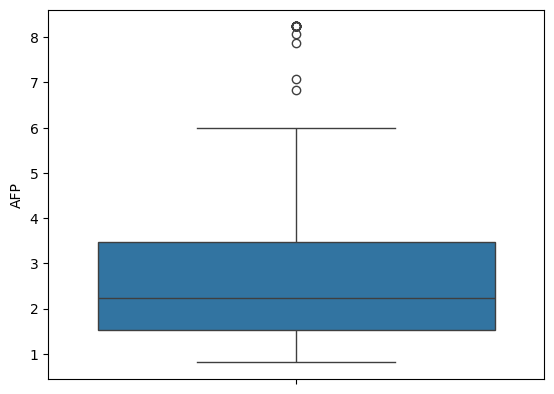

In [180]:
sns.boxplot(final_df['AFP'])

<Axes: ylabel='ALP'>

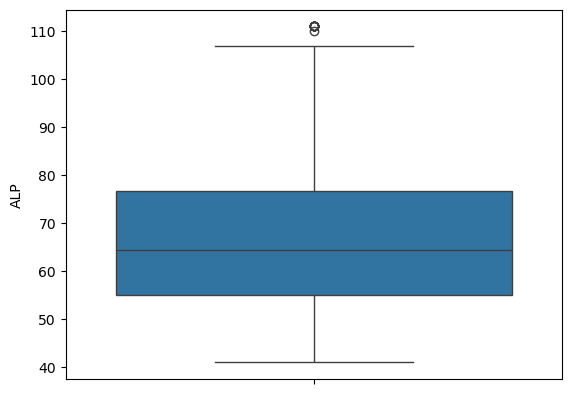

In [181]:
sns.boxplot(final_df['ALP'])

In [182]:
final_df.isnull().sum()

AFP       0
AG        0
ALB       0
ALP       0
ALT       0
AST       0
BASO#     0
BASO%     0
BUN       0
Ca        0
CA125     0
CA19-9    0
CA72-4    0
CEA       0
CL        0
CO2CP     0
CREA      0
DBIL      0
EO#       0
EO%       0
GGT       0
GLO       0
GLU.      0
HCT       0
HE4       0
HGB       0
IBIL      0
K         0
LYM#      0
LYM%      0
MCH       0
MCV       0
Mg        0
MONO#     0
MONO%     0
MPV       0
Na        0
NEU       0
PCT       0
PDW       0
PHOS      0
PLT       0
RBC       0
RDW       0
TBIL      0
TP        0
UA        0
Age       0
TYPE      0
dtype: int64

IQR

In [183]:
def remove_outliers_iqr(df):
    """
    Detect and truncate outliers using IQR method.
    Any value beyond 1.5 * IQR from the lower or upper quartile is considered an outlier
    and will be truncated to the respective bounds.
    """
    # Create a copy of the dataset
    df_outliers_removed = df.copy()

    for column in df_outliers_removed.select_dtypes(include=[np.number]):  # Process only numeric columns
        Q1 = df_outliers_removed[column].quantile(0.25)  # 25th percentile (lower quartile)
        Q3 = df_outliers_removed[column].quantile(0.75)  # 75th percentile (upper quartile)
        IQR = Q3 - Q1  # Inter-quartile range

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Truncate the outliers to the lower or upper bounds
        df_outliers_removed[column] = np.where(df_outliers_removed[column] < lower_bound, 
                                               lower_bound, 
                                               df_outliers_removed[column])
        df_outliers_removed[column] = np.where(df_outliers_removed[column] > upper_bound, 
                                               upper_bound, 
                                               df_outliers_removed[column])
    return df_outliers_removed

In [184]:
IQR_outlier_knn_imputer = remove_outliers_iqr(data_knn_imputed)

In [185]:
# Combine Age and Type columns with winsorized data
IQR_outlier_knn_imputer = pd.concat([IQR_outlier_knn_imputer, age_type_df], axis=1)

In [186]:
IQR_outlier_knn_imputer

,AFP,AG,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,Age,TYPE
0,3.580,19.36,45.40,56.000,11.0,24.0,0.01,0.30,5.35,2.48,15.36000,36.480,6.42000,1.400,107.40,19.9,91.0,2.00,0.040,1.00,16.0,28.50,4.67,0.290875,43.00200,92.5,3.50,5.36,0.65,16.8,33.7000,100.0,0.78000,0.22,5.70,11.70,141.3000,76.2000,0.090,13.4,1.46,82.125,3.36375,13.7000,5.5,73.9,366.6875,47,0
1,1.500,18.40,45.40,77.000,9.0,18.0,0.03,0.60,3.80,2.57,56.08000,12.180,3.57800,0.770,102.60,22.2,48.0,4.70,0.030,0.60,10.0,32.50,4.64,0.391000,47.56000,131.0,10.10,4.30,1.10,23.7,28.4000,84.6,1.00000,0.25,5.40,11.40,138.9000,69.7000,0.130,15.2,0.97,112.000,4.62000,12.0000,14.8,77.9,209.2000,39,0
2,2.360,19.97,35.00,47.000,21.0,27.0,0.01,0.10,4.89,2.48,250.28125,11.150,12.20225,0.420,99.60,26.2,70.3,2.20,0.110,1.60,24.0,31.50,4.07,0.383000,89.78875,122.0,3.10,4.77,1.98,28.8,27.7000,87.0,1.08000,0.65,10.00,10.40,141.0000,59.5000,0.280,11.9,0.94,272.000,4.40000,13.4000,5.3,66.5,206.0000,45,0
3,3.790,17.39,32.90,109.375,33.5,30.5,0.02,0.42,4.47,2.49,55.97000,22.570,0.74000,1.330,99.30,20.1,80.7,5.90,0.010,0.19,37.0,39.40,6.59,0.306000,49.95000,96.5,2.20,4.89,0.52,11.1,24.2375,76.0,0.93000,0.07,1.51,9.49,133.9875,85.9775,0.265,19.1,0.68,279.000,4.44000,18.0875,8.1,72.3,218.2000,44,0
4,2.668,21.87,38.74,54.800,28.8,18.2,0.02,0.50,2.60,2.24,15.45200,8.352,5.77000,1.424,103.20,21.3,44.0,3.48,0.060,1.50,22.8,30.86,6.59,0.421000,47.70000,138.0,7.42,4.20,1.28,32.7,29.7000,90.7,0.68125,0.19,4.80,12.10,137.7000,60.5000,0.180,16.8,1.50,148.000,4.64000,12.1000,10.9,69.6,151.9000,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3.270,21.32,48.60,60.000,30.0,16.0,0.03,0.50,4.86,2.58,13.61000,8.370,5.67200,0.590,96.50,24.6,67.0,2.90,0.060,1.10,29.0,25.80,4.39,0.440000,40.17000,147.0,4.80,4.12,1.36,24.3,30.4000,91.1,0.94000,0.21,3.80,10.90,138.3000,52.2800,0.230,13.2,1.07,210.000,4.83000,12.1000,7.7,74.4,366.6875,43,1
226,2.090,20.91,48.60,65.000,33.5,30.0,0.00,0.00,4.29,2.81,50.80000,15.110,3.64400,1.740,98.10,25.9,54.0,3.80,0.010,0.30,36.0,31.80,5.13,0.415000,31.45000,142.0,6.90,4.11,1.18,30.7,31.1000,91.0,0.94000,0.28,7.30,9.90,140.8000,60.0600,0.220,10.8,0.99,219.000,4.56000,11.9000,10.7,80.4,241.5000,52,1
227,2.000,12.14,46.10,49.000,9.0,20.0,0.00,0.00,3.12,2.29,21.93000,0.620,3.25400,1.670,103.60,25.0,67.0,5.90,0.020,0.30,9.0,27.40,4.59,0.290875,44.44000,92.5,11.30,3.64,1.39,23.3,24.2375,76.0,0.77000,0.32,5.40,11.90,137.1000,59.2800,0.310,17.3,0.95,262.000,4.24000,17.7000,17.2,73.5,240.5000,37,1
228,1.840,27.22,47.80,64.000,26.0,22.0,0.03,0.30,3.61,2.82,53.87000,10.710,3.04800,0.930,94.25,23.1,59.0,3.50,0.195,2.20,25.0,28.20,5.59,0.458000,30.78000,154.0,7.80,4.22,2.15,20.6,28.8000,85.6,1.02000,0.43,4.10,10.50,139.2000,55.9800,0.420,13.4,1.31,397.125,5.35000,12.5000,11.3,76.0,285.7000,30,1


In [187]:
final_df.to_csv('OC_pre_meno_knn_imputation_outliered_winsorize.csv', index=False)

In [188]:
IQR_outlier_knn_imputer.to_csv('OC_pre_meno_knn_imputation_outliered_IQR.csv',index=False)

In [189]:
X= final_df.drop("TYPE",axis=1)
y= final_df["TYPE"]

In [190]:
y.value_counts()

TYPE
1    155
0     75
Name: count, dtype: int64

TYPE = {1:Malignant, 0:Benign}

In [191]:
label_mapping = {0: 1, 1: 0}
y = y.map(label_mapping)
y.value_counts()

TYPE
0    155
1     75
Name: count, dtype: int64

In [192]:
X.shape

(230, 48)

<Axes: xlabel='TYPE', ylabel='count'>

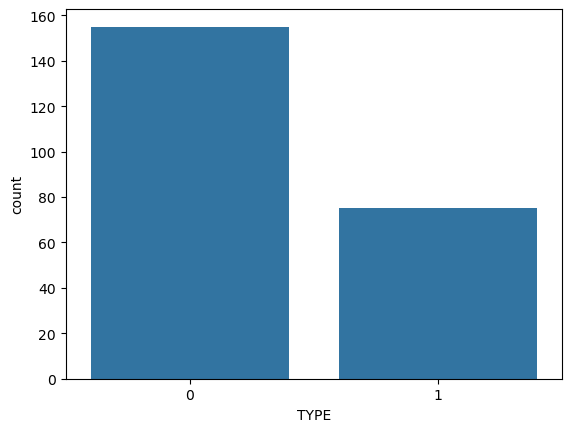

In [193]:
# Visualizations
sns.countplot(x=y, data=data)  # Check for class imbalance

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Z-Score normalization

In [195]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model

In [202]:
knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
svm = SVC(random_state=10, kernel='rbf')
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_jobs=-1, random_state=10)
ada = AdaBoostClassifier(random_state=100)
lgbm = LGBMClassifier(n_jobs=-1, random_state=10)
grad = GradientBoostingClassifier()
xg = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

classifiers = {
    'KNN': knn,
    'SVM': svm,
    'Logistic Regression': lr,
    'Random Forest': rf,
    'AdaBoost': ada,
    #'LightGBM': lgbm,
    'Gradient Boosting': grad,
    'XGBoost': xg
}


In [203]:
scores={'accuracy': make_scorer(accuracy_score),
        'recall' : make_scorer(recall_score),
        'specificity':make_scorer(recall_score,pos_label=0),
        'gmean': make_scorer(geometric_mean_score),
        'roc': make_scorer(roc_auc_score),
        'precision': make_scorer(precision_score),
        'mcc':  make_scorer(matthews_corrcoef)
        }

In [198]:
#RF
score = cross_validate(rf, X,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            51.787839
score_time           9.605007
test_accuracy       82.608696
test_recall         60.178571
test_specificity    93.500000
test_gmean          74.024264
test_roc            76.839286
test_precision      84.277778
test_mcc            59.872460
dtype: float64

In [199]:
# knn
score = cross_validate(knn, X,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.563083
score_time          40.454516
test_accuracy       75.217391
test_recall         36.071429
test_specificity    94.166667
test_gmean          55.646365
test_roc            65.119048
test_precision      81.190476
test_mcc            39.945740
dtype: float64

In [200]:
# ada
score = cross_validate(ada, X,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            38.491566
score_time           5.578454
test_accuracy       81.304348
test_recall         64.464286
test_specificity    89.583333
test_gmean          74.719632
test_roc            77.023810
test_precision      77.726190
test_mcc            57.631600
dtype: float64

In [ ]:
# xgboost
score = cross_validate(xg, X,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

In [204]:
# Define a dictionary to store results for each classifier
results = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Sensitivity (Recall)': [],
    'Specificity': [],
    'F1 Score': [],
    'ROC-AUC': [],
    'G-Mean': [],
    'MCC': []
}

# Loop through each classifier and evaluate
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
    
    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Precision
    precision = precision_score(y_test, y_pred)
    
    # Sensitivity (Recall)
    sensitivity = recall_score(y_test, y_pred)
    
    # Specificity: TN / (TN + FP)
    specificity = tn / (tn + fp)
    
    # F1-Score
    f1 = f1_score(y_test, y_pred)
    
    # ROC-AUC (only if probabilities are available)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # G-Mean: sqrt(sensitivity * specificity)
    g_mean = np.sqrt(sensitivity * specificity)
    
    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Append the results to the dictionary
    results['Classifier'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Sensitivity (Recall)'].append(sensitivity)
    results['Specificity'].append(specificity)
    results['F1 Score'].append(f1)
    results['ROC-AUC'].append(roc_auc)
    results['G-Mean'].append(g_mean)
    results['MCC'].append(mcc)

# Convert results dictionary to a DataFrame for easier comparison
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


c:\Users\thani\anaconda3.x\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


            Classifier  Accuracy  Precision  Sensitivity (Recall)  \
0                  KNN  0.840580   0.888889              0.444444   
1                  SVM  0.840580   0.705882              0.666667   
2  Logistic Regression  0.739130   0.500000              0.555556   
3        Random Forest  0.869565   0.800000              0.666667   
4             AdaBoost  0.840580   0.705882              0.666667   
5    Gradient Boosting  0.869565   0.764706              0.722222   
6              XGBoost  0.826087   0.687500              0.611111   

   Specificity  F1 Score   ROC-AUC    G-Mean       MCC  
0     0.980392  0.592593  0.845316  0.660098  0.553919  
1     0.901961  0.685714       NaN  0.775440  0.579459  
2     0.803922  0.526316  0.808279  0.668299  0.347920  
3     0.941176  0.727273  0.867647  0.792118  0.647098  
4     0.901961  0.685714  0.825708  0.775440  0.579459  
5     0.921569  0.742857  0.912854  0.815829  0.656055  
6     0.901961  0.647059  0.880174  0.742427  0.

c:\Users\thani\anaconda3.x\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:13:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


IQR testing

In [205]:
X= IQR_outlier_knn_imputer.drop("TYPE",axis=1)
y= IQR_outlier_knn_imputer["TYPE"]

In [206]:
y.value_counts()

TYPE
1    155
0     75
Name: count, dtype: int64

TYPE = {1:Malignant, 0:Benign}

In [207]:
label_mapping = {0: 1, 1: 0}
y = y.map(label_mapping)
y.value_counts()

TYPE
0    155
1     75
Name: count, dtype: int64

In [208]:
X.shape

(230, 48)

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Z-Score normalization

In [210]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [211]:
knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
svm = SVC(random_state=10, kernel='rbf')
lr = LogisticRegression(max_iter=2000)
rf = RandomForestClassifier(n_jobs=-1, random_state=10)
ada = AdaBoostClassifier(random_state=100, algorithm='SAMME')
lgbm = LGBMClassifier(n_jobs=-1, random_state=10)
grad = GradientBoostingClassifier()
xg = XGBClassifier(eval_metric='logloss')

classifiers = {
    'KNN': knn,
    'SVM': svm,
    'Logistic Regression': lr,
    'Random Forest': rf,
    'AdaBoost': ada,
    #'LightGBM': lgbm,
    'Gradient Boosting': grad,
    'XGBoost': xg
}


In [212]:
# Define a dictionary to store results for each classifier
results = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Sensitivity (Recall)': [],
    'Specificity': [],
    'F1 Score': [],
    'ROC-AUC': [],
    'G-Mean': [],
    'MCC': []
}

# Loop through each classifier and evaluate
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
    
    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Precision
    precision = precision_score(y_test, y_pred)
    
    # Sensitivity (Recall)
    sensitivity = recall_score(y_test, y_pred)
    
    # Specificity: TN / (TN + FP)
    specificity = tn / (tn + fp)
    
    # F1-Score
    f1 = f1_score(y_test, y_pred)
    
    # ROC-AUC (only if probabilities are available)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # G-Mean: sqrt(sensitivity * specificity)
    g_mean = np.sqrt(sensitivity * specificity)
    
    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Append the results to the dictionary
    results['Classifier'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Sensitivity (Recall)'].append(sensitivity)
    results['Specificity'].append(specificity)
    results['F1 Score'].append(f1)
    results['ROC-AUC'].append(roc_auc)
    results['G-Mean'].append(g_mean)
    results['MCC'].append(mcc)

# Convert results dictionary to a DataFrame for easier comparison
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


            Classifier  Accuracy  Precision  Sensitivity (Recall)  \
0                  KNN  0.826087   0.875000              0.388889   
1                  SVM  0.826087   0.666667              0.666667   
2  Logistic Regression  0.768116   0.550000              0.611111   
3        Random Forest  0.855072   0.785714              0.611111   
4             AdaBoost  0.840580   0.705882              0.666667   
5    Gradient Boosting  0.826087   0.714286              0.555556   
6              XGBoost  0.826087   0.687500              0.611111   

   Specificity  F1 Score   ROC-AUC    G-Mean       MCC  
0     0.980392  0.538462  0.767429  0.617465  0.506487  
1     0.882353  0.666667       NaN  0.766965  0.549020  
2     0.823529  0.578947  0.801743  0.709414  0.420667  
3     0.941176  0.687500  0.887800  0.758395  0.603033  
4     0.901961  0.685714  0.839869  0.775440  0.579459  
5     0.921569  0.625000  0.924837  0.715530  0.520964  
6     0.901961  0.647059  0.855120  0.742427  0.

Mice Imputed

In [213]:
data.head()

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,3.58,19.36,47,45.4,56.0,11.0,24.0,0.01,0.30,5.35,2.48,15.36,36.48,6.42,1.40,107.4,19.9,103.0,2.0,0.04,1.00,16.0,28.5,4.67,0.273,NaN,89.0,3.5,5.36,0.65,16.8,33.7,103.4,0.78,0.22,5.70,11.70,141.3,76.2,0.090,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4,0
1,1.50,18.40,39,45.4,77.0,9.0,18.0,0.03,0.60,3.80,2.57,56.08,12.18,NaN,0.77,102.6,22.2,48.0,4.7,0.03,0.60,10.0,32.5,4.64,0.391,47.56,131.0,10.1,4.30,1.10,23.7,28.4,84.6,1.00,0.25,5.40,11.40,138.9,69.7,0.130,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2,0
2,2.36,19.97,45,35.0,47.0,21.0,27.0,0.01,0.10,4.89,2.48,1391.00,11.15,NaN,0.42,99.6,26.2,70.3,2.2,0.11,1.60,24.0,31.5,4.07,0.383,404.90,122.0,3.1,4.77,1.98,28.8,27.7,87.0,1.08,0.69,10.00,10.40,141.0,59.5,0.280,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0,0
3,3.79,17.39,44,32.9,118.0,51.0,32.0,0.02,0.42,4.47,2.49,55.97,22.57,0.74,1.33,99.3,20.1,80.7,5.9,0.01,0.19,75.0,39.4,7.52,0.306,49.95,96.5,2.2,4.89,0.52,11.1,21.8,69.0,0.93,0.07,1.51,9.49,131.9,86.8,0.265,19.1,0.68,279,4.44,21.7,8.1,72.3,218.2,0
4,NaN,21.87,53,NaN,NaN,NaN,NaN,0.02,0.50,2.60,2.24,NaN,NaN,NaN,NaN,103.2,21.3,44.0,NaN,0.06,1.50,NaN,NaN,7.10,0.421,NaN,138.0,NaN,4.20,1.28,32.7,29.7,90.7,0.65,0.19,4.80,12.10,137.7,60.5,0.180,16.8,1.50,148,4.64,12.1,NaN,NaN,151.9,0


In [214]:
# Separate Age and Type
age_type_df = data[['Age', 'TYPE']] 
data_df = data.drop(columns=['Age', 'TYPE'])  

In [215]:
mice_imputer = IterativeImputer(random_state=42)
data_mice_imputed = pd.DataFrame(imputer.fit_transform(data_df), columns=data_df.columns)

In [216]:
data_mice_imputed

,AFP,AG,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
0,3.580,19.36,45.40,56.0,11.0,24.0,0.01,0.30,5.35,2.48,15.360,36.480,6.420,1.400,107.4,19.9,103.0,2.00,0.04,1.00,16.0,28.50,4.67,0.273,43.002,89.0,3.50,5.36,0.65,16.8,33.7,103.4,0.78,0.22,5.70,11.70,141.3,76.20,0.090,13.4,1.46,74.0,2.64,13.7,5.5,73.9,396.4
1,1.500,18.40,45.40,77.0,9.0,18.0,0.03,0.60,3.80,2.57,56.080,12.180,3.578,0.770,102.6,22.2,48.0,4.70,0.03,0.60,10.0,32.50,4.64,0.391,47.560,131.0,10.10,4.30,1.10,23.7,28.4,84.6,1.00,0.25,5.40,11.40,138.9,69.70,0.130,15.2,0.97,112.0,4.62,12.0,14.8,77.9,209.2
2,2.360,19.97,35.00,47.0,21.0,27.0,0.01,0.10,4.89,2.48,1391.000,11.150,12.922,0.420,99.6,26.2,70.3,2.20,0.11,1.60,24.0,31.50,4.07,0.383,404.900,122.0,3.10,4.77,1.98,28.8,27.7,87.0,1.08,0.69,10.00,10.40,141.0,59.50,0.280,11.9,0.94,272.0,4.40,13.4,5.3,66.5,206.0
3,3.790,17.39,32.90,118.0,51.0,32.0,0.02,0.42,4.47,2.49,55.970,22.570,0.740,1.330,99.3,20.1,80.7,5.90,0.01,0.19,75.0,39.40,7.52,0.306,49.950,96.5,2.20,4.89,0.52,11.1,21.8,69.0,0.93,0.07,1.51,9.49,131.9,86.80,0.265,19.1,0.68,279.0,4.44,21.7,8.1,72.3,218.2
4,2.668,21.87,38.74,54.8,28.8,18.2,0.02,0.50,2.60,2.24,15.452,8.352,5.770,1.424,103.2,21.3,44.0,3.48,0.06,1.50,22.8,30.86,7.10,0.421,47.700,138.0,7.42,4.20,1.28,32.7,29.7,90.7,0.65,0.19,4.80,12.10,137.7,60.50,0.180,16.8,1.50,148.0,4.64,12.1,10.9,69.6,151.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3.270,21.32,48.60,60.0,30.0,16.0,0.03,0.50,4.86,2.58,13.610,8.370,5.672,0.590,96.5,24.6,67.0,2.90,0.06,1.10,29.0,25.80,4.39,0.440,40.170,147.0,4.80,4.12,1.36,24.3,30.4,91.1,0.94,0.21,3.80,10.90,138.3,52.28,0.230,13.2,1.07,210.0,4.83,12.1,7.7,74.4,379.0
226,2.090,20.91,48.60,65.0,40.0,30.0,0.00,0.00,4.29,2.81,50.800,15.110,3.644,1.740,98.1,25.9,54.0,3.80,0.01,0.30,36.0,31.80,5.13,0.415,31.450,142.0,6.90,4.11,1.18,30.7,31.1,91.0,0.94,0.28,7.30,9.90,140.8,60.06,0.220,10.8,0.99,219.0,4.56,11.9,10.7,80.4,241.5
227,2.000,12.14,46.10,49.0,9.0,20.0,0.00,0.00,3.12,2.29,21.930,0.620,3.254,1.670,103.6,25.0,67.0,5.90,0.02,0.30,9.0,27.40,4.59,0.285,44.440,80.0,11.30,3.64,1.39,23.3,18.9,67.2,0.77,0.32,5.40,11.90,137.1,59.28,0.310,17.3,0.95,262.0,4.24,17.7,17.2,73.5,240.5
228,1.840,27.22,47.80,64.0,26.0,22.0,0.03,0.30,3.61,2.82,53.870,10.710,3.048,0.930,93.1,23.1,59.0,3.50,0.23,2.20,25.0,28.20,5.59,0.458,30.780,154.0,7.80,4.22,2.15,20.6,28.8,85.6,1.02,0.43,4.10,10.50,139.2,55.98,0.420,13.4,1.31,398.0,5.35,12.5,11.3,76.0,285.7


Handling Outliers

In [217]:
from scipy.stats.mstats import winsorize
# List of numeric columns except Age and Type
numeric_columns = data_mice_imputed.select_dtypes(include=['float64', 'int64']).columns

# Apply winsorization to numeric columns (excluding Age and Type)
for col in numeric_columns:
    if col not in ['Age', 'TYPE']:  # Assuming TYPE is the column name for Type
        data_imputed[col] = winsorize(data_imputed[col], limits=[0.05, 0.05])

In [218]:
# Combine Age and Type columns with winsorized data
final_mice_df = pd.concat([data_imputed, age_type_df], axis=1)

In [219]:
final_mice_df

,AFP,AG,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,Age,TYPE
0,3.580,19.36,45.40,56.0,11.0,24.0,0.01,0.30,5.35,2.48,15.360,36.480,6.420,1.400,105.0,20.0,83.2,2.00,0.04,1.00,16.0,28.50,4.67,0.312,43.002,96.5,3.50,4.94,0.82,16.8,31.4,94.4,0.79,0.22,5.70,11.70,141.3,76.20,0.133,13.4,1.43,150.0,3.75,13.7,5.5,73.9,326.7,47,0
1,1.500,18.40,45.40,77.0,9.0,18.0,0.03,0.60,3.80,2.57,56.080,12.180,3.578,0.770,102.6,22.2,48.0,4.70,0.03,0.60,10.0,32.50,4.64,0.391,47.560,131.0,10.10,4.30,1.10,23.7,28.4,84.6,1.00,0.25,5.40,11.40,138.9,69.70,0.133,15.2,0.97,150.0,4.62,12.0,14.8,77.9,209.2,39,0
2,2.360,19.97,35.00,47.0,21.0,27.0,0.01,0.10,4.89,2.48,865.700,11.150,12.922,0.420,99.6,26.2,70.3,2.20,0.11,1.60,24.0,31.50,4.07,0.383,264.700,122.0,3.10,4.77,1.98,28.8,27.7,87.0,1.08,0.60,8.84,10.40,141.0,59.50,0.280,11.9,0.94,272.0,4.40,13.4,5.3,66.5,206.0,45,0
3,3.790,17.39,32.90,111.0,35.0,30.0,0.02,0.42,4.47,2.49,55.970,22.570,0.740,1.330,99.3,20.1,80.7,5.80,0.01,0.19,50.0,38.10,6.24,0.312,49.950,96.5,2.80,4.89,0.82,11.1,22.9,77.2,0.93,0.16,3.10,9.49,135.8,81.10,0.265,18.8,0.79,279.0,4.44,17.7,8.1,72.3,218.2,44,0
4,2.668,21.87,38.74,54.8,28.8,18.2,0.02,0.50,2.60,2.24,15.452,8.352,5.770,1.424,103.2,21.3,47.5,3.48,0.06,1.50,22.8,30.86,6.24,0.421,47.700,138.0,7.42,4.20,1.28,32.7,29.7,90.7,0.79,0.19,4.80,12.10,137.7,60.50,0.180,16.8,1.43,150.0,4.64,12.1,10.9,69.6,151.9,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3.270,21.32,48.60,60.0,30.0,16.0,0.03,0.50,4.86,2.58,13.610,8.370,5.672,0.590,96.6,24.6,67.0,2.90,0.06,1.10,29.0,25.80,4.39,0.440,40.170,147.0,4.80,4.12,1.36,24.3,30.4,91.1,0.94,0.21,3.80,10.90,138.3,52.28,0.230,13.2,1.07,210.0,4.83,12.1,7.7,74.4,326.7,43,1
226,2.090,20.91,48.60,65.0,35.0,30.0,0.00,0.00,4.29,2.73,50.800,15.110,3.644,1.740,98.1,25.9,54.0,3.80,0.01,0.30,36.0,31.80,5.13,0.415,33.420,142.0,6.90,4.11,1.18,30.7,31.1,91.0,0.94,0.28,7.30,9.90,140.8,60.06,0.220,10.8,0.99,219.0,4.56,11.9,10.7,80.2,241.5,52,1
227,2.000,12.46,46.10,49.0,9.0,20.0,0.00,0.00,3.12,2.29,21.930,0.770,3.254,1.670,103.6,25.0,67.0,5.80,0.02,0.30,9.0,27.40,4.59,0.312,44.440,96.5,10.40,3.71,1.39,23.3,22.9,77.2,0.79,0.32,5.40,11.90,137.1,59.28,0.310,17.3,0.95,262.0,4.24,17.7,16.0,73.5,240.5,37,1
228,1.840,24.83,47.80,64.0,26.0,22.0,0.03,0.30,3.61,2.73,53.870,10.710,3.048,0.930,96.6,23.1,59.0,3.50,0.23,2.20,25.0,28.20,5.59,0.441,33.420,147.0,7.80,4.22,2.15,20.6,28.8,85.6,1.02,0.43,4.10,10.50,139.2,55.98,0.370,13.4,1.31,380.0,5.01,12.5,11.3,76.0,285.7,30,1


In [220]:
final_mice_df.isnull().sum()

AFP       0
AG        0
ALB       0
ALP       0
ALT       0
AST       0
BASO#     0
BASO%     0
BUN       0
Ca        0
CA125     0
CA19-9    0
CA72-4    0
CEA       0
CL        0
CO2CP     0
CREA      0
DBIL      0
EO#       0
EO%       0
GGT       0
GLO       0
GLU.      0
HCT       0
HE4       0
HGB       0
IBIL      0
K         0
LYM#      0
LYM%      0
MCH       0
MCV       0
Mg        0
MONO#     0
MONO%     0
MPV       0
Na        0
NEU       0
PCT       0
PDW       0
PHOS      0
PLT       0
RBC       0
RDW       0
TBIL      0
TP        0
UA        0
Age       0
TYPE      0
dtype: int64

<Axes: ylabel='AFP'>

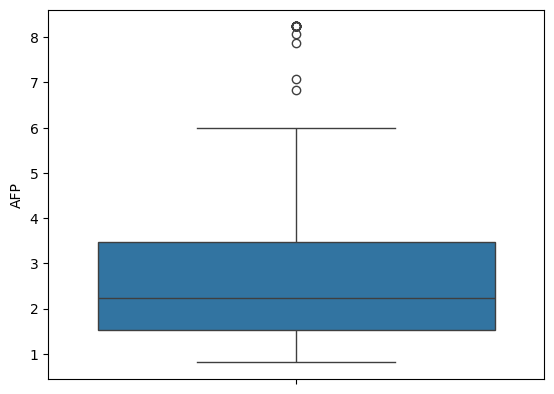

In [221]:
sns.boxplot(final_mice_df['AFP'])

In [222]:
final_mice_df.to_csv('OC_pre_meno_mice_imputation_outliered_winsorize.csv', index=False)

In [223]:
X= final_mice_df.drop("TYPE",axis=1)
y= final_mice_df["TYPE"]

In [224]:
y.value_counts()

TYPE
1    155
0     75
Name: count, dtype: int64

TYPE = {1:Malignant, 0:Benign}

In [225]:
label_mapping = {0: 1, 1: 0}
y = y.map(label_mapping)
y.value_counts()

TYPE
0    155
1     75
Name: count, dtype: int64

In [226]:
X.shape

(230, 48)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Z-Score normalization

In [228]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model

In [229]:
knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
svm = SVC(random_state=10, kernel='rbf')
lr = LogisticRegression(max_iter=2000)
rf = RandomForestClassifier(n_jobs=-1, random_state=10)
ada = AdaBoostClassifier(random_state=100, algorithm='SAMME')
lgbm = LGBMClassifier(n_jobs=-1, random_state=10)
grad = GradientBoostingClassifier()
xg = XGBClassifier(eval_metric='logloss')

classifiers = {
    'KNN': knn,
    'SVM': svm,
    'Logistic Regression': lr,
    'Random Forest': rf,
    'AdaBoost': ada,
    #'LightGBM': lgbm,
    'Gradient Boosting': grad,
    'XGBoost': xg
}


In [230]:
# scores={'accuracy': make_scorer(accuracy_score),
#         'recall' : make_scorer(recall_score),
#         'specificity':make_scorer(recall_score,pos_label=0),
#         'gmean': make_scorer(geometric_mean_score),
#         'roc': make_scorer(roc_auc_score),
#         'precision': make_scorer(precision_score),
#         'mcc':  make_scorer(matthews_corrcoef)
#         }

In [231]:
# Define a dictionary to store results for each classifier
results = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Sensitivity (Recall)': [],
    'Specificity': [],
    'F1 Score': [],
    'ROC-AUC': [],
    'G-Mean': [],
    'MCC': []
}

# Loop through each classifier and evaluate
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
    
    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Precision
    precision = precision_score(y_test, y_pred)
    
    # Sensitivity (Recall)
    sensitivity = recall_score(y_test, y_pred)
    
    # Specificity: TN / (TN + FP)
    specificity = tn / (tn + fp)
    
    # F1-Score
    f1 = f1_score(y_test, y_pred)
    
    # ROC-AUC (only if probabilities are available)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # G-Mean: sqrt(sensitivity * specificity)
    g_mean = np.sqrt(sensitivity * specificity)
    
    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Append the results to the dictionary
    results['Classifier'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Sensitivity (Recall)'].append(sensitivity)
    results['Specificity'].append(specificity)
    results['F1 Score'].append(f1)
    results['ROC-AUC'].append(roc_auc)
    results['G-Mean'].append(g_mean)
    results['MCC'].append(mcc)

# Convert results dictionary to a DataFrame for easier comparison
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


            Classifier  Accuracy  Precision  Sensitivity (Recall)  \
0                  KNN  0.840580   0.888889              0.444444   
1                  SVM  0.840580   0.705882              0.666667   
2  Logistic Regression  0.739130   0.500000              0.555556   
3        Random Forest  0.869565   0.800000              0.666667   
4             AdaBoost  0.797101   0.611111              0.611111   
5    Gradient Boosting  0.855072   0.750000              0.666667   
6              XGBoost  0.826087   0.687500              0.611111   

   Specificity  F1 Score   ROC-AUC    G-Mean       MCC  
0     0.980392  0.592593  0.845316  0.660098  0.553919  
1     0.901961  0.685714       NaN  0.775440  0.579459  
2     0.803922  0.526316  0.808279  0.668299  0.347920  
3     0.941176  0.727273  0.867647  0.792118  0.647098  
4     0.862745  0.611111  0.824619  0.726108  0.473856  
5     0.921569  0.705882  0.915033  0.783823  0.612033  
6     0.901961  0.647059  0.880174  0.742427  0.

IQR

In [232]:
def remove_outliers_iqr(df):
    """
    Detect and truncate outliers using IQR method.
    Any value beyond 1.5 * IQR from the lower or upper quartile is considered an outlier
    and will be truncated to the respective bounds.
    """
    # Create a copy of the dataset
    df_outliers_removed = df.copy()

    for column in df_outliers_removed.select_dtypes(include=[np.number]):  # Process only numeric columns
        Q1 = df_outliers_removed[column].quantile(0.25)  # 25th percentile (lower quartile)
        Q3 = df_outliers_removed[column].quantile(0.75)  # 75th percentile (upper quartile)
        IQR = Q3 - Q1  # Inter-quartile range

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Truncate the outliers to the lower or upper bounds
        df_outliers_removed[column] = np.where(df_outliers_removed[column] < lower_bound, 
                                               lower_bound, 
                                               df_outliers_removed[column])
        df_outliers_removed[column] = np.where(df_outliers_removed[column] > upper_bound, 
                                               upper_bound, 
                                               df_outliers_removed[column])
    return df_outliers_removed

In [233]:
IQR_outlier_mice_imputer = remove_outliers_iqr(data_mice_imputed)

In [234]:
# Combine Age and Type columns with winsorized data
IQR_outlier_mice_imputer = pd.concat([IQR_outlier_mice_imputer, age_type_df], axis=1)

In [248]:
IQR_outlier_mice_imputer

,AFP,AG,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,Age,TYPE
0,3.580,19.36,45.40,56.000,11.0,24.0,0.01,0.30,5.35,2.48,15.36000,36.480,6.42000,1.400,107.40,19.9,91.0,2.00,0.040,1.00,16.0,28.50,4.67,0.290875,43.00200,92.5,3.50,5.36,0.65,16.8,33.7000,100.0,0.78000,0.22,5.70,11.70,141.3000,76.2000,0.090,13.4,1.46,82.125,3.36375,13.7000,5.5,73.9,366.6875,47,0
1,1.500,18.40,45.40,77.000,9.0,18.0,0.03,0.60,3.80,2.57,56.08000,12.180,3.57800,0.770,102.60,22.2,48.0,4.70,0.030,0.60,10.0,32.50,4.64,0.391000,47.56000,131.0,10.10,4.30,1.10,23.7,28.4000,84.6,1.00000,0.25,5.40,11.40,138.9000,69.7000,0.130,15.2,0.97,112.000,4.62000,12.0000,14.8,77.9,209.2000,39,0
2,2.360,19.97,35.00,47.000,21.0,27.0,0.01,0.10,4.89,2.48,250.28125,11.150,12.20225,0.420,99.60,26.2,70.3,2.20,0.110,1.60,24.0,31.50,4.07,0.383000,89.78875,122.0,3.10,4.77,1.98,28.8,27.7000,87.0,1.08000,0.65,10.00,10.40,141.0000,59.5000,0.280,11.9,0.94,272.000,4.40000,13.4000,5.3,66.5,206.0000,45,0
3,3.790,17.39,32.90,109.375,33.5,30.5,0.02,0.42,4.47,2.49,55.97000,22.570,0.74000,1.330,99.30,20.1,80.7,5.90,0.010,0.19,37.0,39.40,6.59,0.306000,49.95000,96.5,2.20,4.89,0.52,11.1,24.2375,76.0,0.93000,0.07,1.51,9.49,133.9875,85.9775,0.265,19.1,0.68,279.000,4.44000,18.0875,8.1,72.3,218.2000,44,0
4,2.668,21.87,38.74,54.800,28.8,18.2,0.02,0.50,2.60,2.24,15.45200,8.352,5.77000,1.424,103.20,21.3,44.0,3.48,0.060,1.50,22.8,30.86,6.59,0.421000,47.70000,138.0,7.42,4.20,1.28,32.7,29.7000,90.7,0.68125,0.19,4.80,12.10,137.7000,60.5000,0.180,16.8,1.50,148.000,4.64000,12.1000,10.9,69.6,151.9000,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,3.270,21.32,48.60,60.000,30.0,16.0,0.03,0.50,4.86,2.58,13.61000,8.370,5.67200,0.590,96.50,24.6,67.0,2.90,0.060,1.10,29.0,25.80,4.39,0.440000,40.17000,147.0,4.80,4.12,1.36,24.3,30.4000,91.1,0.94000,0.21,3.80,10.90,138.3000,52.2800,0.230,13.2,1.07,210.000,4.83000,12.1000,7.7,74.4,366.6875,43,1
226,2.090,20.91,48.60,65.000,33.5,30.0,0.00,0.00,4.29,2.81,50.80000,15.110,3.64400,1.740,98.10,25.9,54.0,3.80,0.010,0.30,36.0,31.80,5.13,0.415000,31.45000,142.0,6.90,4.11,1.18,30.7,31.1000,91.0,0.94000,0.28,7.30,9.90,140.8000,60.0600,0.220,10.8,0.99,219.000,4.56000,11.9000,10.7,80.4,241.5000,52,1
227,2.000,12.14,46.10,49.000,9.0,20.0,0.00,0.00,3.12,2.29,21.93000,0.620,3.25400,1.670,103.60,25.0,67.0,5.90,0.020,0.30,9.0,27.40,4.59,0.290875,44.44000,92.5,11.30,3.64,1.39,23.3,24.2375,76.0,0.77000,0.32,5.40,11.90,137.1000,59.2800,0.310,17.3,0.95,262.000,4.24000,17.7000,17.2,73.5,240.5000,37,1
228,1.840,27.22,47.80,64.000,26.0,22.0,0.03,0.30,3.61,2.82,53.87000,10.710,3.04800,0.930,94.25,23.1,59.0,3.50,0.195,2.20,25.0,28.20,5.59,0.458000,30.78000,154.0,7.80,4.22,2.15,20.6,28.8000,85.6,1.02000,0.43,4.10,10.50,139.2000,55.9800,0.420,13.4,1.31,397.125,5.35000,12.5000,11.3,76.0,285.7000,30,1


<Axes: ylabel='AFP'>

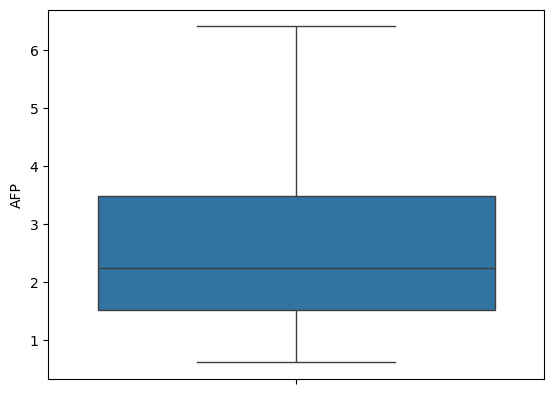

In [260]:
sns.boxplot(IQR_outlier_mice_imputer['AFP'])

In [236]:
IQR_outlier_mice_imputer.to_csv('OC_pre_meno_mice_imputation_outliered_IQR.csv', index=False)

In [249]:
X= IQR_outlier_mice_imputer.drop("TYPE",axis=1)
y= IQR_outlier_mice_imputer["TYPE"]

In [250]:
y.value_counts()

TYPE
1    155
0     75
Name: count, dtype: int64

TYPE = {1:Malignant, 0:Benign}

In [251]:
label_mapping = {0: 1, 1: 0}
y = y.map(label_mapping)
y.value_counts()

TYPE
0    155
1     75
Name: count, dtype: int64

In [252]:
X.shape

(230, 48)

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Z-Score normalization

In [254]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [243]:
knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
svm = SVC(random_state=10, kernel='rbf')
lr = LogisticRegression(max_iter=2000)
rf = RandomForestClassifier(n_jobs=-1, random_state=10)
ada = AdaBoostClassifier(random_state=100, algorithm='SAMME')
lgbm = LGBMClassifier(n_jobs=-1, random_state=10)
grad = GradientBoostingClassifier()
xg = XGBClassifier(eval_metric='logloss')

classifiers = {
    'KNN': knn,
    'SVM': svm,
    'Logistic Regression': lr,
    'Random Forest': rf,
    'AdaBoost': ada,
    #'LightGBM': lgbm,
    'Gradient Boosting': grad,
    'XGBoost': xg
}


In [244]:
# Define a dictionary to store results for each classifier
results = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Sensitivity (Recall)': [],
    'Specificity': [],
    'F1 Score': [],
    'ROC-AUC': [],
    'G-Mean': [],
    'MCC': []
}

# Loop through each classifier and evaluate
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
    
    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Precision
    precision = precision_score(y_test, y_pred)
    
    # Sensitivity (Recall)
    sensitivity = recall_score(y_test, y_pred)
    
    # Specificity: TN / (TN + FP)
    specificity = tn / (tn + fp)
    
    # F1-Score
    f1 = f1_score(y_test, y_pred)
    
    # ROC-AUC (only if probabilities are available)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # G-Mean: sqrt(sensitivity * specificity)
    g_mean = np.sqrt(sensitivity * specificity)
    
    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Append the results to the dictionary
    results['Classifier'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Sensitivity (Recall)'].append(sensitivity)
    results['Specificity'].append(specificity)
    results['F1 Score'].append(f1)
    results['ROC-AUC'].append(roc_auc)
    results['G-Mean'].append(g_mean)
    results['MCC'].append(mcc)

# Convert results dictionary to a DataFrame for easier comparison
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


            Classifier  Accuracy  Precision  Sensitivity (Recall)  \
0                  KNN  0.826087   0.875000              0.388889   
1                  SVM  0.826087   0.666667              0.666667   
2  Logistic Regression  0.768116   0.550000              0.611111   
3        Random Forest  0.855072   0.785714              0.611111   
4             AdaBoost  0.840580   0.705882              0.666667   
5    Gradient Boosting  0.826087   0.714286              0.555556   
6              XGBoost  0.826087   0.687500              0.611111   

   Specificity  F1 Score   ROC-AUC    G-Mean       MCC  
0     0.980392  0.538462  0.767429  0.617465  0.506487  
1     0.882353  0.666667       NaN  0.766965  0.549020  
2     0.823529  0.578947  0.801743  0.709414  0.420667  
3     0.941176  0.687500  0.887800  0.758395  0.603033  
4     0.901961  0.685714  0.839869  0.775440  0.579459  
5     0.921569  0.625000  0.915033  0.715530  0.520964  
6     0.901961  0.647059  0.855120  0.742427  0.